In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
import time

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Обозначьте целевую переменную за `y`, а остальные данные за `X`.

In [3]:
data_load = sklearn.datasets.fetch_openml(name='confidence', version=1)
print(data_load['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

CODING:

ITEM 1 = BUSINESS CONDIDIONS 6 MONTHS FROM NOW  (CONFERENCE BOARD)
ITEM 2 = JOBS 6 MONTHS FROM NOW (CONFERENCE BOARD)
ITEM 3 = FAMILY INCOME 6 MONTHS FROM NOW  (CONFERENCE BOARD)
ITEM 4 = BUSINESS CONDITIONS A YEAR FROM NOW  (MICHIGAN)
ITEM 5 = JOBS DURING THE COMING 12 MONTHS  (MICHIGAN)
ITEM 6 = FAMILY INCOME DURING THE NEXT 12 MONTHS  (MICHIGAN)

RESPONSE P = PESSIMISTIC
RESPONSE N = NEUTRAL
RESPONSE O = OPTIMISTIC


1992 DATA:




I AM GORDON BECHTEL AT E-MAIL BECHTEL AT NERVM.NERDC.UFL.EDU
I AM WILLING TO HELP THOSE WHO HAVE PROBLEMS WITH THESE DATA.


(3) THE CONFERENCE BOARD HAS GIVEN ITS PERMISSION TO PLACE ITS THREE
"6 MONTH" ITEMS IN STATLIB.
THE SURVEY RESEARCH CENTER AT THE UNIVERSITY OF MICHIGAN HAS GIVEN
ITS PERMISSION TO PLACE ITS THREE "12 MONTH" ITEMS IN STATLIB.


Information about the dataset
CLASSTYPE: nominal
CLASSINDEX: 1

Downloaded from openml.org.


In [4]:
data = pd.DataFrame(data=data_load.data, columns=data_load['feature_names'])
data['Target'] = data_load.target
data

,P,N,O,Target
0,668.9,2100.4,641.2,BUSINESS_CONDIDIONS_6_MONTHS_FROM_NOW
1,984.3,1920.2,502.6,JOBS_6_MONTHS_FROM_NOW
2,433.2,2329.1,658.5,FAMILY_INCOME_6_MONTHS_FROM_NOW
3,132.6,219.3,147.9,BUSINESS_CONDITIONS_A_YEAR_FROM_NOW
4,290.7,168.3,45.9,JOBS_DURING_THE_COMING_12_MONTHS
...,...,...,...,...
67,565.5,1884.0,692.6,JOBS_6_MONTHS_FROM_NOW
68,339.9,2128.6,689.4,FAMILY_INCOME_6_MONTHS_FROM_NOW
69,55.4,191.5,236.9,BUSINESS_CONDITIONS_A_YEAR_FROM_NOW
70,131.0,231.8,136.1,JOBS_DURING_THE_COMING_12_MONTHS


In [5]:
y_for_code = data['Target']
y_for_code

0       BUSINESS_CONDIDIONS_6_MONTHS_FROM_NOW
1                      JOBS_6_MONTHS_FROM_NOW
2             FAMILY_INCOME_6_MONTHS_FROM_NOW
3         BUSINESS_CONDITIONS_A_YEAR_FROM_NOW
4            JOBS_DURING_THE_COMING_12_MONTHS
                       ...                   
67                     JOBS_6_MONTHS_FROM_NOW
68            FAMILY_INCOME_6_MONTHS_FROM_NOW
69        BUSINESS_CONDITIONS_A_YEAR_FROM_NOW
70           JOBS_DURING_THE_COMING_12_MONTHS
71    FAMILY_INCOME_DURING_THE_NEXT_12_MONTHS
Name: Target, Length: 72, dtype: category
Categories (6, object): ['BUSINESS_CONDIDIONS_6_MONTHS_FROM_NOW', 'BUSINESS_CONDITIONS_A_YEAR_FROM_NOW', 'FAMILY_INCOME_6_MONTHS_FROM_NOW', 'FAMILY_INCOME_DURING_THE_NEXT_12_MONTHS', 'JOBS_6_MONTHS_FROM_NOW', 'JOBS_DURING_THE_COMING_12_MONTHS']

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [7]:
data["code"] = ord_enc.fit_transform(np.array(y_for_code).reshape(-1, 1))
data

,P,N,O,Target,code
0,668.9,2100.4,641.2,BUSINESS_CONDIDIONS_6_MONTHS_FROM_NOW,0.0
1,984.3,1920.2,502.6,JOBS_6_MONTHS_FROM_NOW,4.0
2,433.2,2329.1,658.5,FAMILY_INCOME_6_MONTHS_FROM_NOW,2.0
3,132.6,219.3,147.9,BUSINESS_CONDITIONS_A_YEAR_FROM_NOW,1.0
4,290.7,168.3,45.9,JOBS_DURING_THE_COMING_12_MONTHS,5.0
...,...,...,...,...,...
67,565.5,1884.0,692.6,JOBS_6_MONTHS_FROM_NOW,4.0
68,339.9,2128.6,689.4,FAMILY_INCOME_6_MONTHS_FROM_NOW,2.0
69,55.4,191.5,236.9,BUSINESS_CONDITIONS_A_YEAR_FROM_NOW,1.0
70,131.0,231.8,136.1,JOBS_DURING_THE_COMING_12_MONTHS,5.0


In [8]:
y = data['code']
X = data.drop(['Target', 'code'], axis=1)

In [9]:
X, X.shape

(        P       N      O
 0   668.9  2100.4  641.2
 1   984.3  1920.2  502.6
 2   433.2  2329.1  658.5
 3   132.6   219.3  147.9
 4   290.7   168.3   45.9
 ..    ...     ...    ...
 67  565.5  1884.0  692.6
 68  339.9  2128.6  689.4
 69   55.4   191.5  236.9
 70  131.0   231.8  136.1
 71   50.4   126.0  322.6
 
 [72 rows x 3 columns],
 (72, 3))

In [10]:
y, y.shape

(0     0.0
 1     4.0
 2     2.0
 3     1.0
 4     5.0
      ... 
 67    4.0
 68    2.0
 69    1.0
 70    5.0
 71    3.0
 Name: code, Length: 72, dtype: float64,
 (72,))

2. (1 балл) Выведите основную статистическую информацию о данных. Сделайте количественное описание датасета: число строк (объектов), число столбцов (признаков), статистику по признакам, количество классов (значений целевой переменной).

In [11]:
data.describe()

,P,N,O,code
count,72.000000,72.000000,72.000000,72.00000
mean,338.573611,1184.440278,400.640278,2.50000
std,263.799902,1005.269043,250.289483,1.71981
min,50.400000,120.200000,45.900000,0.00000
25%,89.200000,209.050000,150.300000,1.00000
50%,309.950000,1067.400000,359.200000,2.50000
75%,474.225000,2171.025000,620.125000,4.00000
max,1051.600000,2567.000000,899.100000,5.00000


In [12]:
print(f'Количество строк: {X.shape[0]}, Количество столбцов: {X.shape[1]}')
print(f'Количесвто классов: {len(y.unique())}')

Количество строк: 72, Количество столбцов: 3
Количесвто классов: 6


3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, ве признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   P       72 non-null     float64 
 1   N       72 non-null     float64 
 2   O       72 non-null     float64 
 3   Target  72 non-null     category
 4   code    72 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 2.7 KB


Перевод категориальных данных в численные был проведен в 1 пункте.

4. (2 балла) Обучите модель логистической регрессии на рассматриваемых данных из библиотеки `sklearn`. Рассчитайте метрики accuracy и выведите таблицу классификации.


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_model = LogisticRegression(solver='lbfgs', max_iter=5000)

start = time.perf_counter()
log_model.fit(X, y)
result_time_log = time.perf_counter() - start
score_log = log_model.score(X, y)

print(f'Время обучения модели: {result_time_log:.6f} sec')
print(f'Коэффициента детерминации: {score_log:.3f}')

Время обучения модели: 0.646952 sec
Коэффициента детерминации: 0.903


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [134]:
y_pred = log_model.predict(X)
accuracy_log = accuracy_score(y, y_pred)
print(f'Точность модели: {accuracy_log.round(4)}')

Точность модели: 0.9028


In [83]:
confusion_matrix(y, y_pred) #Матрица классификации

array([[ 7,  0,  3,  0,  2,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 1,  0, 11,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 1,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

<AxesSubplot:>

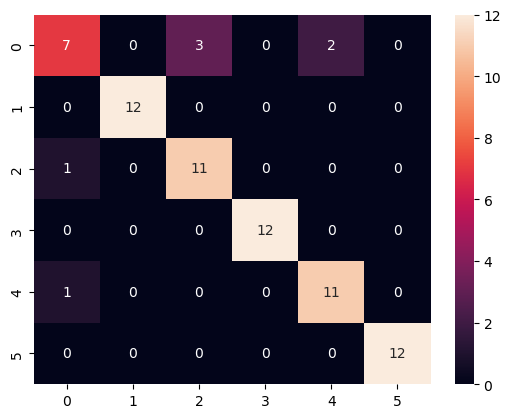

In [86]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True)

Вывод по матрице классификации: класс "0" был правильно предсказан 7 раз и 2 раза был отнесен ко "2" и "4" классам. Все объекты "1", "3", "5" классов были распознаны правильно. Несколько объектов "2" и "4" классов ошибочно были приняты за "1" класс и "0" соответственно.

5. (2 балла) Обучите полиномиальную модель классификации. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные степени полинома и выберите ту, которая работает лучше.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

Время обучения модели с полиномом 3-ой степени: 3.820272 sec
Точность модели: 1.0


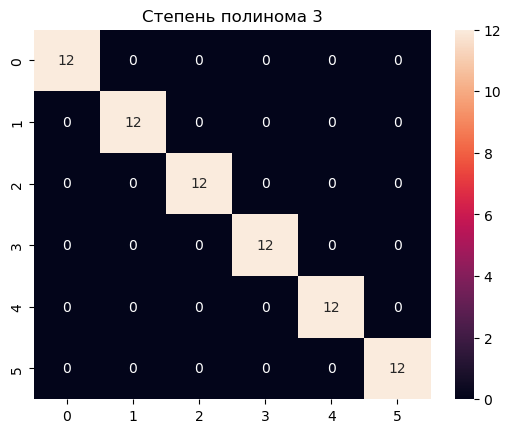

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Время обучения модели с полиномом 5-ой степени: 0.019973 sec
Точность модели: 0.1667


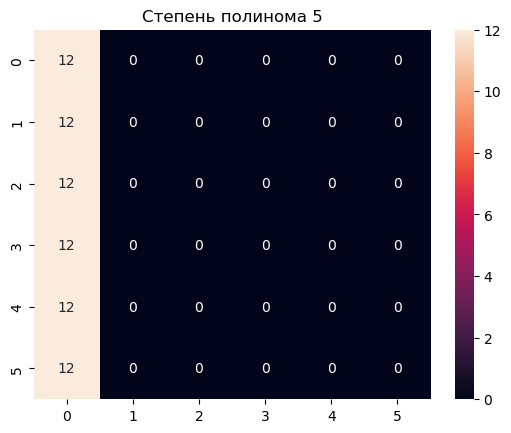

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Время обучения модели с полиномом 10-ой степени: 0.024216 sec
Точность модели: 0.1667


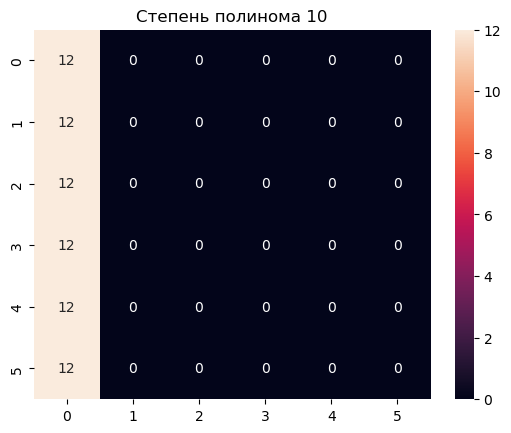

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Время обучения модели с полиномом 15-ой степени: 0.033176 sec
Точность модели: 0.1667


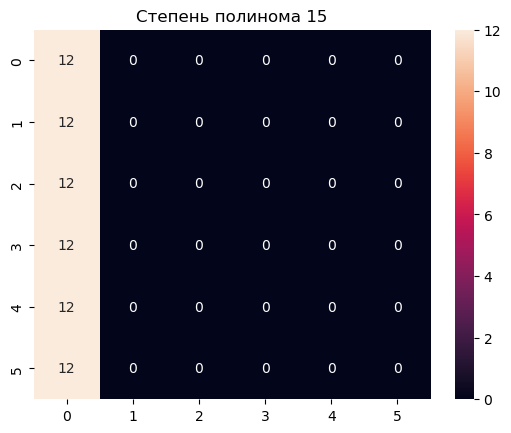

In [20]:
degrees = [3, 5, 10, 15]
times_poly = []
accur_poly = []

for degree in degrees:
    transformation = PolynomialFeatures(degree=degree)
    transformation.fit(X)
    X_transform = transformation.transform(X)
    
    start = time.perf_counter()
    logistic = LogisticRegression(solver='lbfgs', max_iter=7000).fit(X_transform, y)
    result_time_poly = time.perf_counter() - start
    
    y_pred_poly = logistic.predict(X_transform)
    accuracy_poly = accuracy_score(y, y_pred_poly)
    
    print(f'Время обучения модели с полиномом {degree}-ой степени: {result_time_poly:.6f} sec')
    print(f'Точность модели: {accuracy_poly.round(4)}')
    
    sns.heatmap(confusion_matrix(y, y_pred_poly), annot=True)
    plt.title(f'Степень полинома {degree}')
    plt.show()
    
    times_poly.append(result_time_poly)
    accur_poly.append(accuracy_poly)

Вывод: при значении степени полинома 3 модель эффективность модели равняется 97%, что является очень хорошим результатом. Полиномы большей степени приведут к переобучению модели, поэтому их использование нецелесообразно. 

6. (2 балла) Обучите модель классификации по методу опорных векторов. Рассчитайте метрики accuracy и выведите таблицу классификации. Попробуйте разные ядерные функции и выберите ту, которая работает лучше.

In [21]:
from sklearn.svm import SVC

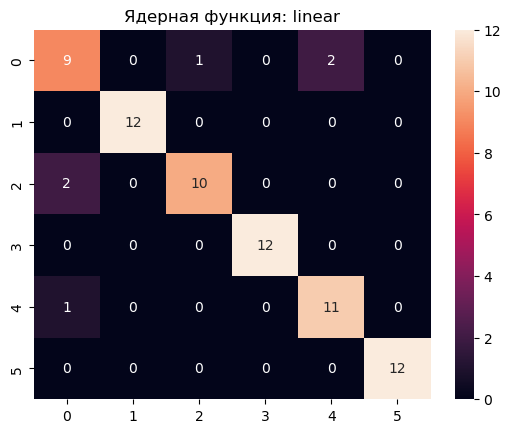

Время обучения модели с ядерной функцией linear: 0.142891 sec
Точность работы модели: 0.9167


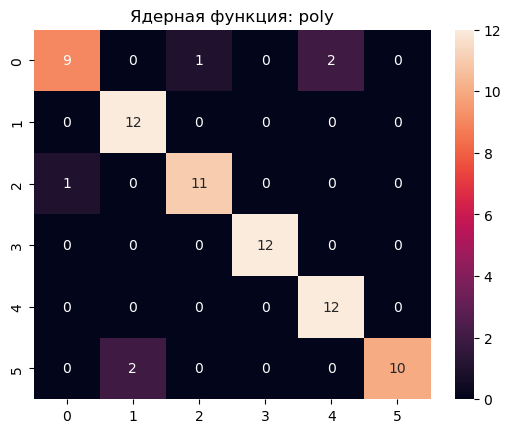

Время обучения модели с ядерной функцией poly: 0.004220 sec
Точность работы модели: 0.9167


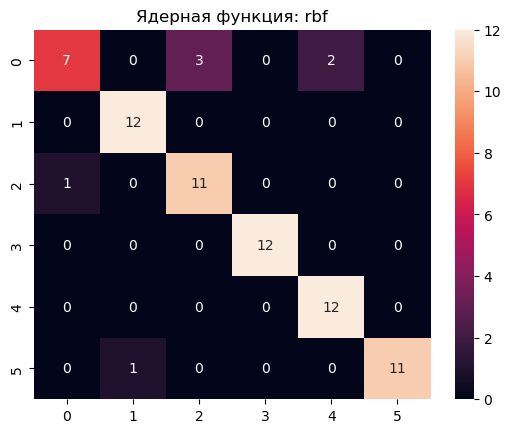

Время обучения модели с ядерной функцией rbf: 0.005166 sec
Точность работы модели: 0.9028


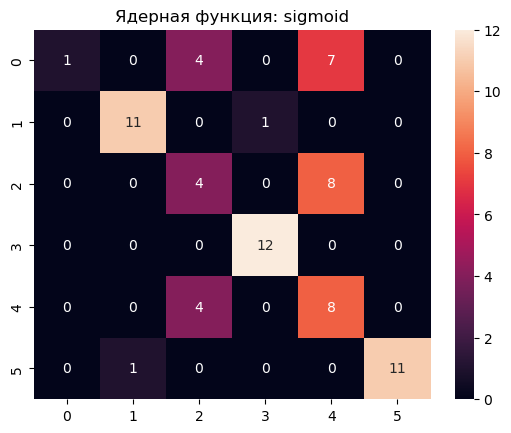

Время обучения модели с ядерной функцией sigmoid: 0.004381 sec
Точность работы модели: 0.6528


In [22]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
times_svm = []
accur_svm = []

for kernel in kernels:
    svm_linear = SVC(kernel=kernel, C=100)
    
    start = time.perf_counter()
    svm_linear_model = svm_linear.fit(X, y)
    result_time_svm = time.perf_counter() - start
    
    y_pred_svm = svm_linear.predict(X)
    accuracy_svm = accuracy_score(y, y_pred_svm)
    
    sns.heatmap(confusion_matrix(y, y_pred_svm), annot=True,)
    plt.title(f'Ядерная функция: {kernel}')
    plt.show()
    
    print(f'Время обучения модели с ядерной функцией {kernel}: {result_time_svm:.6f} sec')
    print(f'Точность работы модели: {accuracy_svm.round(4)}')
    
    times_svm.append(result_time_svm)
    accur_svm.append(accuracy_svm)

Вывод: Медленне всего сработала модель с линейным ядром. Однако точность у моделей с линейным, гауссовым и полимиальным ядрами различается всего на приблизительно 0,01 часть или вовсе равны. Что нельзя сказать о модели с сигмоидным ядром: она сработала хуже всех с точностью 65%

7. (1 балл) Обучите модель классификации Перцептрон. Рассчитайте метрики accuracy и выведите таблицу классификации.

In [129]:
from sklearn.linear_model import Perceptron

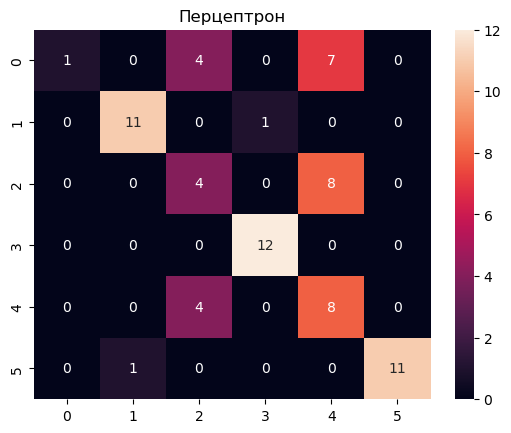

Время обучения модели: 0.015729 sec
Точность работы модели: 0.5139


In [208]:
class_perceptron = Perceptron(max_iter=100, random_state=3)
start = time.perf_counter()
class_perceptron.fit(X, y)
result_time_perc = time.perf_counter() - start
y_pred_perc = class_perceptron.predict(X)
accuracy_perc = accuracy_score(y, y_pred_perc)

sns.heatmap(confusion_matrix(y, y_pred_svm), annot=True,)
plt.title(f'Перцептрон')
plt.show()

print(f'Время обучения модели: {result_time_perc:.6f} sec')
print(f'Точность работы модели: {accuracy_perc.round(4)}')

8. (2 балла) Выведите итоговую таблицу сравнения всех моделей. В таблице должна быть информация о эффективности и времени обучения каждой модели. Сделайте вывод о применимости и эффективности моделей для классификации объектов в данной задаче.

In [199]:
table_log = pd.DataFrame({'Model': ['Logistic Regression'], 
                          'Accuracy': accuracy_log,
                         'Training time': result_time_log,
                         'Degree': 1})

table_poly = pd.DataFrame({'Model': ['Polynomial classification'], 
                          'Accuracy': accur_poly[0],
                         'Training time': times_poly[0],
                          'Degree': degrees[0]})

table_svm = pd.DataFrame({'Model': ['SVM classification' for _ in range(4)],
                          'Accuracy': accur_svm,
                         'Training time': times_svm,
                         'Kernel': kernels})

table_perc = pd.DataFrame({'Model': ['Perceptron'], 
                          'Accuracy': accuracy_perc,
                         'Training time': result_time_perc})

In [202]:
pd.concat([table_log, table_poly, table_svm, table_perc], axis=0)

,Model,Accuracy,Training time,Degree,Kernel
0,Logistic Regression,0.902778,0.391936,1.0,NaN
0,Polynomial classification,0.972222,2.045944,3.0,NaN
0,SVM classification,0.916667,0.109404,NaN,linear
1,SVM classification,0.916667,0.002759,NaN,poly
2,SVM classification,0.902778,0.004091,NaN,rbf
3,SVM classification,0.652778,0.003495,NaN,sigmoid
0,Perceptron,0.513889,0.012688,NaN,NaN


Вывод: В данной задачи можно применить логистическую, полиномиальную модель 3 степени или модели с использованием метода опорных векторов таких ядер, как полиномиальное, Гауссово и линейное. 